# Outline

This research proposal will consist of the following:

[Imports](#import)

[1. About the Dataset.](#1.-About-the-Dataset)

[2. Exploratory Data Analysis.](#2.-Exploratory-Data-Analysis)

- [2.1 Clean and Visualize Continuous Variables](#2.1.-Clean-and-Visualize-Continuous-Variables)
- [2.2 Clean and Visualize Categorical Variables](#2.2.-Clean-and-Visualize-Categorical-Variables)
    - [2.2.1 Clean 'Indusrty Vertical' Variable](#2.2.1.-Clean-'Industry-Vertical'-Variable)
    - [2.2.2. Clean 'Investor Name' Variable](#2.2.2.-Clean-'Investor-Name'-Variable)
    - [2.2.3. Clean 'Investment Type' Variable](#2.2.3.-Clean-'Investment-Type'-Variable)
    - [2.2.4. Clean 'CityLocation' Variable](#2.2.4.-Clean-'City-Location'-Variable)
    - [2.2.5. Clean 'Date' Variable](#2.2.4.-Clean-'Date'-Variable)
- [2.3 How does the funding ecosystem change with time](#2.3.-How-does-the-funding-ecosystem-change-with-time)
- [2.4 Which industries are favored by investors for funding?](#2.4.-Which-industries-are-favored-by-investors-for-funding?)
- [2.5 Do cities play a major role in funding?](#2.5.-Do-cities-play-a-major-role-in-funding?)
- [2.6 Who are the important investors in the Indian Ecosystem?](#2.6.-Who-are-the-important-investors-in-the-Indian-Ecosystem?)
- [2.7 How much funds does startups generally get in India?](#2.7.-How-much-funds-does-startups-generally-get-in-India?)

[3. Experimental Design.](#3.-Experimental-Design)

- [3.1 Problem](#3.1.-Problem)
- [3.2 Solution](#3.2.-Solution)
- [3.3 Hypothesis](#3.3.-Hypothesis)
- [3.4 Sample Selection](#3.4.-Sample-Selection)
- [3.5 Treatment](#3.5.-Treatment)

[4. Rollout and Evaluation](#4.-Rollout-and-Evaluation)

- [4.1 Rollout Plan](#4.1.-Rollout-Plan)
- [4.2 Evaluation Plan](#4.2.-Evaluation-Plan)


# 1. About the Dataset

This dataset has funding information of the Indian startups from January 2015 to August 2017.
It includes columns with the date funded, the city the startup is based out of, 
the names of the funders, and the amount invested (in USD).

# 2. Exploratory Data Analysis

<a id='import'></a>
# Importing Data

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
# read file and see the number of rows and columns
data = pd.read_csv('startup_funding.csv')
data.shape

(2372, 10)

In [3]:
# See column names
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

<a id='start-eda'></a>
# Starting EDA

In [4]:
# drop SNo as not needed
data = data.drop(['SNo'], axis=1)

In [5]:
# Check for missing values
data.isnull().sum()

Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

In [6]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 9 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: object(9)
memory usage: 83.4+ KB


## 2.1. Clean and Visualize Continuous Variables

[Back to Ouline](#Outline)

Amount is our only continuous variable. Let's clean it and get a statistical summary.

In [7]:
# finding out if Amount is numeric
df = data['AmountInUSD']
def is_a_string(x):
    return str(x).isdigit()
print(df.apply(is_a_string).sum())

0


In [8]:
# fillind in the missing amounts with 0
data.AmountInUSD.fillna(0, inplace=True)

In [9]:
# converting amount from string to numeric
def amount_converter(amount):
    amount = str(amount).replace(',', '')
    return int(amount)/1000

In [10]:
data['AmountInUSD'] = data['AmountInUSD'].apply(amount_converter)
print(data['AmountInUSD'].describe().apply(round))
print('median: ', np.median(data.AmountInUSD))
print('mean: ', np.mean(data.AmountInUSD))
print('sum: ', np.sum(data.AmountInUSD))

count       2372
mean        7735
std        51658
min            0
25%            0
50%          300
75%         2500
max      1400000
Name: AmountInUSD, dtype: int64
median:  300.0
mean:  7734.9858667790895
sum:  18347386.476


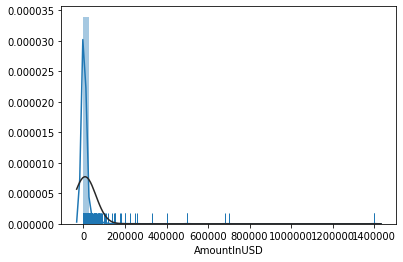

In [11]:
# Plotting the distribution for amount invested
from scipy.stats import norm
sns.distplot(data.AmountInUSD, rug=True, fit=norm)

In [12]:
data['AmountInUSD'].value_counts().head(n=5)

0.0       847
1000.0    130
500.0      91
100.0      55
2000.0     55
Name: AmountInUSD, dtype: int64

In [13]:
# Replace noise with the mean amount.
def amount_neutralizer(amount):
    if amount < 1:
        amount = 150
    if amount >  900000:
        amount = 7735
        
    else:
        amount = amount
    return amount

In [14]:
data['AmountInUSD'] = data['AmountInUSD'].apply(amount_neutralizer)

count      2372
mean       6615
std       32116
min          16
25%         150
50%         300
75%        2500
max      700000
Name: AmountInUSD, dtype: int64
median:  300.0


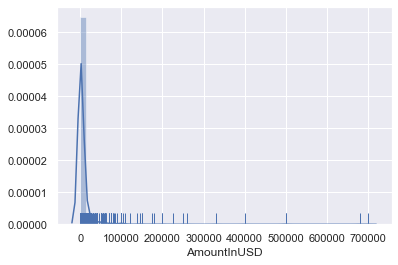

In [15]:
# Get a statistical summary, median amount and histogram.
print(data.AmountInUSD.describe().apply(round))
print('median: ', np.median(data.AmountInUSD))

sns.set(style="darkgrid")
sns.distplot(data.AmountInUSD, rug=True)

**Takeaway:** Most investments are between 150,000 and  2,500,000 dollars

## 2.2. Clean and Visualize Categorical Variables

[Back to Ouline](#Outline)

### 2.2.1. Clean 'Industry Vertical' Variable
Industry Vertical is a very important variable here because it's very possible that the effects of investing vary by Industry verticals. We also don't have that much data so we **can't afford to drop the noisy values.** We'll try to do some cleaning.

In [16]:
data.IndustryVertical.isnull().value_counts()

False    2201
True      171
Name: IndustryVertical, dtype: int64

In [17]:
data.IndustryVertical.fillna('Other', inplace=True)
data.IndustryVertical.isnull().value_counts()

False    2372
Name: IndustryVertical, dtype: int64

In [18]:
data['IndustryVertical'] = data['IndustryVertical'].str.lower()
data['IndustryVertical'] = data['IndustryVertical'].str.replace('others', 'other')
data['IndustryVertical'] = data['IndustryVertical'].str.replace('online food delivery', 'food delivery platform')

In [19]:
data['IndustryVertical'].value_counts().head(n=15)

consumer internet               772
technology                      313
ecommerce                       230
other                           177
healthcare                       31
logistics                        24
education                        20
food & beverage                  19
food delivery platform            9
finance                           9
online education platform         5
hyperlocal handyman services      4
real estate                       4
logistics tech                    3
fmcg                              3
Name: IndustryVertical, dtype: int64

In [20]:
#data['IndustryVertical']= data['IndustryVertical'].apply(vertical_consolidator)
#data['IndustryVertical'].value_counts()

[Back to Ouline](#Outline)

### 2.2.2. Clean 'Investor Name' Variable


In [21]:
data.InvestorsName.fillna('Other', inplace=True)

In [22]:
data['InvestorsName'] = data['InvestorsName'].str.lower()
data['InvestorsName'] = data['InvestorsName'].str.replace(' ','_')
data['InvestorsName'].value_counts().head(n=15)

undisclosed_investors       71
indian_angel_network        25
ratan_tata                  24
undisclosed_investor        22
group_of_angel_investors    20
kalaari_capital             16
sequoia_capital             14
saif_partners               11
roundglass_partners         10
brand_capital               10
accel_partners               9
undisclosed                  9
info_edge_(india)_ltd        8
other                        8
nexus_venture_partners       7
Name: InvestorsName, dtype: int64

In [23]:
investor_name_append = ['undisclosed_investors','other','undisclosed_investor','undisclosed']

def name_matcher(investor):
    if investor in investor_name_append:
        investor = 'unknown'
    else:
        investor = investor
    return investor

In [24]:
data['InvestorsName']= data['InvestorsName'].apply(name_matcher) 
data['InvestorsName'].value_counts().head(n=15)

unknown                     110
indian_angel_network         25
ratan_tata                   24
group_of_angel_investors     20
kalaari_capital              16
sequoia_capital              14
saif_partners                11
roundglass_partners          10
brand_capital                10
accel_partners                9
info_edge_(india)_ltd         8
nexus_venture_partners        7
tiger_global                  7
youwecan_ventures             7
unitus_seed_fund              7
Name: InvestorsName, dtype: int64

[Back to Ouline](#Outline)

### 2.2.3. Clean 'Investment Type' Variable

In [25]:
#checking for numm value data
data[data.InvestmentType.isnull()]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
890,21/07/2016,Drums Food,food & beverage,Yogurt and Ice Cream maker,Mumbai,"verlinvest,_dsg_consumer_partners",NaN,150.0,NaN


In [26]:
# its not of much dollar value so we drop it
data = data.dropna(subset=['InvestmentType'])

In [27]:
data['InvestmentType'].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
Crowd Funding        1
PrivateEquity        1
Crowd funding        1
Name: InvestmentType, dtype: int64

In [28]:
data['InvestmentType'] = data['InvestmentType'].str.lower()
data['InvestmentType'] = data['InvestmentType'].str.replace('privateequity','private equity')  
data['InvestmentType'] = data['InvestmentType'].str.replace('seedfunding','seed funding')     

In [29]:
data['InvestmentType'].value_counts()

seed funding      1301
private equity    1067
crowd funding        2
debt funding         1
Name: InvestmentType, dtype: int64

In [30]:
data.groupby('InvestmentType')['AmountInUSD'].sum().round()

InvestmentType
crowd funding          156.0
debt funding          7800.0
private equity    15258405.0
seed funding        423396.0
Name: AmountInUSD, dtype: float64

In [31]:
data['AmountInUSD'].sum()

15689756.476

**Takeaway:** Total Investment made in India in the 3 years is about 16 billion dollars - mostly Private Equity

  Lets visualize all 4 categories with dollars Amounts

In [32]:
funding_type = list(data.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False).index)
amount_funding_type = list(data.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False).values)

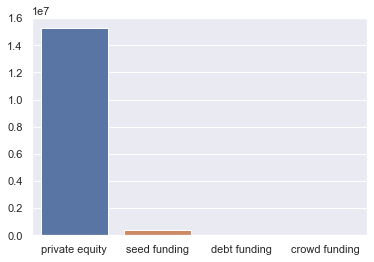

In [33]:
sns.barplot(x = funding_type, y = amount_funding_type)
plt.xticks;

[Back to Ouline](#Outline)

### 2.2.4. Clean 'City Location' Variable


In [34]:
data.CityLocation.fillna('Other', inplace=True)

In [35]:
data['CityLocation'].value_counts().head(30)

Bangalore             627
Mumbai                445
New Delhi             381
Gurgaon               240
Other                 179
Pune                   84
Noida                  78
Hyderabad              76
Chennai                66
Ahmedabad              35
Jaipur                 25
Kolkata                19
Chandigarh             10
Indore                  9
Vadodara                9
Goa                     7
Singapore               5
Kanpur                  4
Pune / US               4
Delhi                   4
Coimbatore              3
Bhopal                  2
Agra                    2
Bangalore / SFO         2
Trivandrum              2
Bangalore/ Bangkok      2
Kochi                   2
Siliguri                2
Udupi                   2
New Delhi / US          2
Name: CityLocation, dtype: int64

In [36]:
data['CityLocation'] = data['CityLocation'].str.lower()

In [37]:
# There are too many errors so lets simplify it
indian_cities = ['bangalore','mumbai','new delhi','gurgaon','pune','noida','hyderabad','chennai','ahemdabad',
                 'jaipur','kolkata','chandigarh','vadodara','indore','goa','kanpur','coimbatore']
def city_matcher(location):
    for city in indian_cities:
        if city in location:
            location = city
        else:
            location = location
    return location

In [38]:
data['CityLocation'] = data['CityLocation'].apply(city_matcher)
data['CityLocation'].value_counts().head(25)

bangalore     637
mumbai        448
new delhi     385
gurgaon       241
other         179
pune           91
noida          79
hyderabad      79
chennai        67
ahmedabad      35
jaipur         25
kolkata        19
chandigarh     10
indore          9
vadodara        9
goa             7
singapore       5
kanpur          4
delhi           4
coimbatore      3
gwalior         2
trivandrum      2
bhopal          2
udupi           2
agra            2
Name: CityLocation, dtype: int64

In [39]:
# there are two many cities lets narrow down to cities with more then 4 investments and group the rest to others
top_indian_cities = ['bangalore','mumbai','new delhi','gurgaon','pune','noida','hyderabad','chennai','ahemdabad',
                 'jaipur','kolkata','chandigarh','vadodara','indore','goa','kanpur','coimbatore']
def top_matcher(city):
    if city not in top_indian_cities:
        city = 'other'
    else:
        city = city
    return city

In [40]:
data['CityLocation'] = data['CityLocation'].apply(top_matcher)
data['CityLocation'].value_counts()

bangalore     637
mumbai        448
new delhi     385
other         258
gurgaon       241
pune           91
noida          79
hyderabad      79
chennai        67
jaipur         25
kolkata        19
chandigarh     10
vadodara        9
indore          9
goa             7
kanpur          4
coimbatore      3
Name: CityLocation, dtype: int64

[Back to Ouline](#Outline)

### 2.2.5. Clean 'Date' Variable

In [41]:
data['Date'].value_counts().head()

02/02/2015    11
30/11/2016    11
08/07/2015    11
04/10/2016    10
24/08/2016     9
Name: Date, dtype: int64

In [42]:
def year_extractor(date):
    date = date[6:]
    return(date)  

In [43]:
data['Date'] = data['Date'].apply(year_extractor)

In [44]:
data['Date'].value_counts()

2015     871
2016     696
2017     442
016      296
015       64
017        1
/2015      1
Name: Date, dtype: int64

In [45]:
data['Date'] = data['Date'].str.replace('016','2016')   
data['Date'] = data['Date'].str.replace('015','2015') 
data['Date'] = data['Date'].str.replace('017','2017')
data['Date'].value_counts()

22015     871
22016     696
22017     442
2016      296
2015       64
2017        1
/22015      1
Name: Date, dtype: int64

In [46]:
data['Date'] = data['Date'].str.replace('22016','2016')   
data['Date'] = data['Date'].str.replace('22015','2015') 
data['Date'] = data['Date'].str.replace('22017','2017') 
data['Date'].value_counts().head()

2016     992
2015     935
2017     443
/2015      1
Name: Date, dtype: int64

In [47]:
data['Date'] = data['Date'].str.replace('/2015','2015') 

In [48]:
data['Date'].value_counts().head()

2016    992
2015    936
2017    443
Name: Date, dtype: int64

**Takeaway:** We have cleaned all categories of importance

There are too many missing data values in subvertical and remarks, we will simply ignore those columns as they are not of much importance for our intial exploration.

In [49]:
data.isnull().sum()

Date                   0
StartupName            0
IndustryVertical       0
SubVertical          936
CityLocation           0
InvestorsName          0
InvestmentType         0
AmountInUSD            0
Remarks             1952
dtype: int64

[Back to Ouline](#Outline)

## 2.3. How does the funding ecosystem change with time

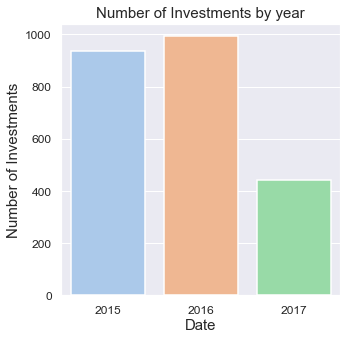

In [50]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams.update({'font.size':5})
plt.tick_params(labelsize = 12)
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.set_context('talk')

sns.countplot(x='Date', data=data)
plt.title('Number of Investments by year', fontsize=15)
plt.ylabel('Number of Investments', fontsize=15)
plt.xlabel('Date', fontsize=15);

In [51]:
data.groupby('Date')['AmountInUSD'].sum().sort_values(ascending = False)

Date
2015    8715322.368
2016    3888988.608
2017    3085445.500
Name: AmountInUSD, dtype: float64

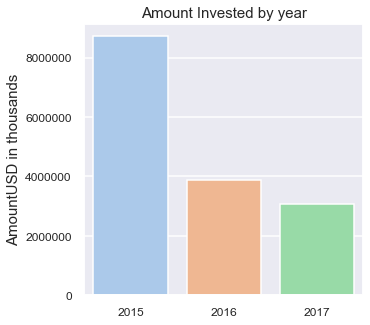

In [52]:
dates_by_amount = list(data.groupby('Date')['AmountInUSD'].sum().sort_values(ascending = False).index)
amount_by_dates = list(data.groupby('Date')['AmountInUSD'].sum().sort_values(ascending = False).values)
sns.barplot(x = dates_by_amount, y = amount_by_dates)
plt.tick_params(labelsize = 12)
plt.title('Amount Invested by year', fontsize=15 )
plt.ylabel('AmountUSD in thousands', fontsize=15);

**Takeaway:** $8 billion was invested in 2015 which went down to abou t3 billion in 2016 and 2017

But the number of investments where about 1000 in 2015 and 2016 and abou t400 in 2017.

Which means many small sized investments where made in 2016.

[Back to Ouline](#Outline)

## 2.4. Which industries are favored by investors for funding?

In [53]:
data['IndustryVertical'].value_counts().sort_values(ascending=False)[0:15]

consumer internet                772
technology                       313
ecommerce                        230
other                            177
healthcare                        31
logistics                         24
education                         20
food & beverage                   18
food delivery platform             9
finance                            9
online education platform          5
hyperlocal handyman services       4
real estate                        4
fmcg                               3
big data & analytics platform      3
Name: IndustryVertical, dtype: int64

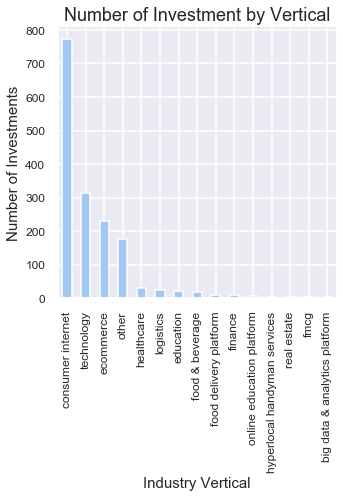

In [54]:
data['IndustryVertical'].value_counts().sort_values(ascending=False)[0:15].plot(kind='bar')
plt.rcParams['figure.figsize'] = [10.0, 5.0]
plt.tick_params(labelsize = 12)
plt.title('Number of Investment by Vertical')
plt.ylabel('Number of Investments',fontsize=15)
plt.xlabel('Industry Vertical',fontsize=15)
plt.show();

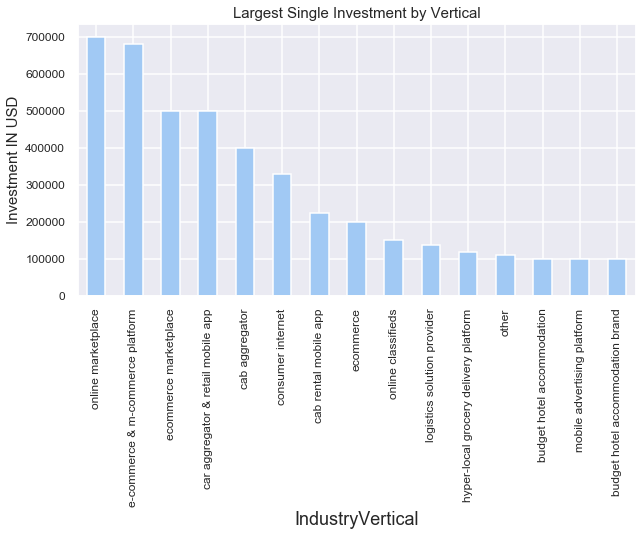

In [55]:
data.groupby('IndustryVertical').AmountInUSD.max().sort_values(ascending=False).head(15).plot(kind='bar')
plt.tick_params(labelsize = 12)
plt.title('Largest Single Investment by Vertical', fontsize=15)
plt.ylabel('Investment IN USD', fontsize=15)
plt.show();

In [56]:
data.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:20]

IndustryVertical
consumer internet                        3843739.000
ecommerce                                1508809.608
other                                    1257299.368
technology                               1122193.500
online marketplace                        700000.000
e-commerce & m-commerce platform          680000.000
ecommerce marketplace                     500000.000
car aggregator & retail mobile app        500000.000
cab aggregator                            400000.000
cab rental mobile app                     225150.000
logistics                                 181845.000
online classifieds                        150000.000
logistics solution provider               137000.000
healthcare                                136743.000
food delivery platform                    126650.000
hyper-local grocery delivery platform     120000.000
online home décor marketplace             100000.000
budget hotel accommodation                100000.000
budget hotel accommodation br

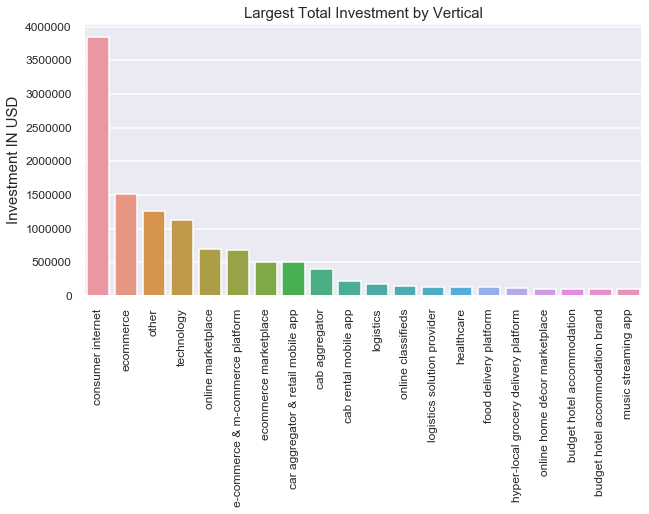

In [57]:
top_Industry_vertical = list(data.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:20].index)
top_Industry_value = list(data.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:20].values)
plt.rcParams['figure.figsize'] = [10.0, 5.0]
plt.tick_params(labelsize = 12)
sns.barplot(x = top_Industry_vertical, y = top_Industry_value)
plt.title('Largest Total Investment by Vertical', fontsize=15)
plt.ylabel('Investment IN USD', fontsize=15)
plt.xticks(rotation = 90);

**Takeaway:** Consumer Internet Vertical had LARGEST number of Investments both by COUNT and DOLLAR AMOUNNTS

BUT Online Market Place got the largest single Investment in 3 years.

[Back to Ouline](#Outline)

## 2.5. Do cities play a major role in funding?

In [58]:
data['CityLocation'].value_counts().sort_values(ascending=False)

bangalore     637
mumbai        448
new delhi     385
other         258
gurgaon       241
pune           91
hyderabad      79
noida          79
chennai        67
jaipur         25
kolkata        19
chandigarh     10
vadodara        9
indore          9
goa             7
kanpur          4
coimbatore      3
Name: CityLocation, dtype: int64

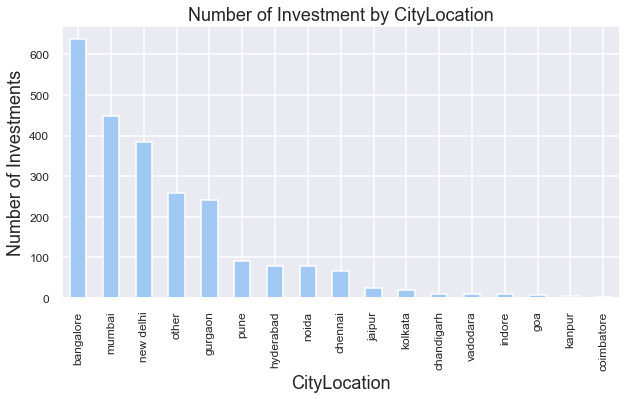

In [59]:
data['CityLocation'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.tick_params(labelsize = 12)
plt.title('Number of Investment by CityLocation')
plt.ylabel('Number of Investments')
plt.xlabel('CityLocation')
plt.show();

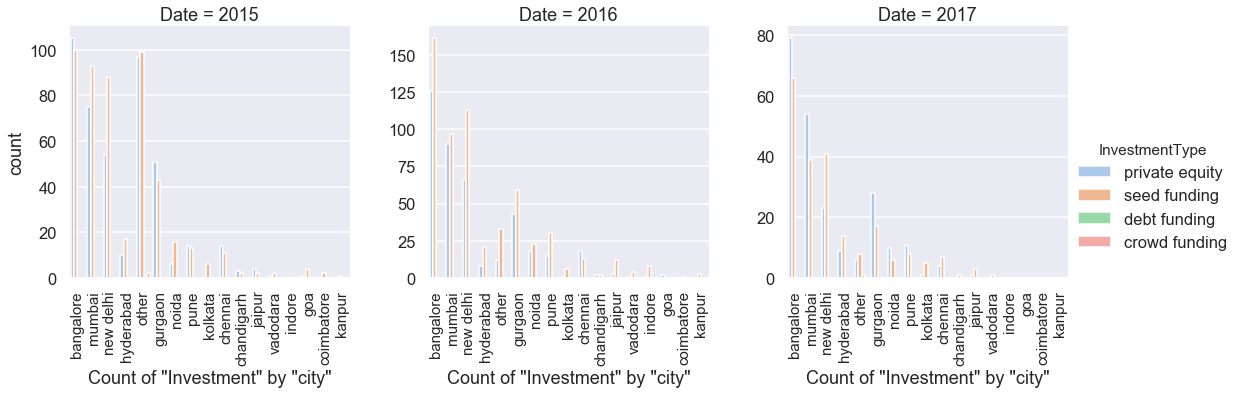

In [60]:
g = sns.catplot(hue='InvestmentType', x='CityLocation', col='Date',kind='count',data=data, sharey=False)
g = g.set_axis_labels('Count of "Investment" by "city"')
g.set_xticklabels(rotation=90, fontsize = 15)
plt.show()

In [61]:
data.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)

CityLocation
bangalore     5674744.108
new delhi     2842897.500
mumbai        2376684.500
gurgaon       2080271.500
other         1459663.868
chennai        414105.000
pune           371303.000
hyderabad      199962.000
noida          175588.000
jaipur          37810.000
chandigarh      26850.000
kolkata         15515.000
vadodara         6640.000
goa              2830.000
indore           2572.000
coimbatore       1800.000
kanpur            520.000
Name: AmountInUSD, dtype: float64

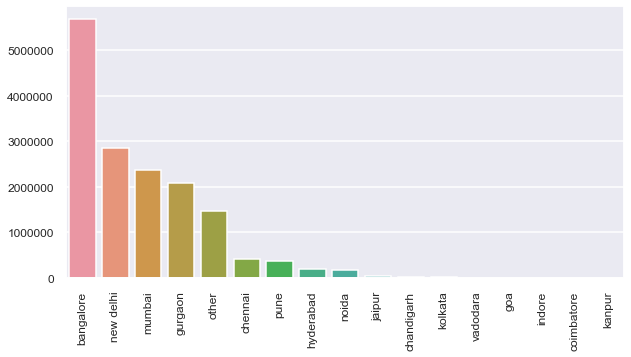

In [62]:
top_city_location = list(data.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[0:20].index)
top_city_value = list(data.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[0:20].values)
plt.rcParams['figure.figsize'] = [10.0, 5.0]
plt.tick_params(labelsize = 12)
sns.barplot(x = top_city_location, y = top_city_value)
plt.xticks(rotation = 90);

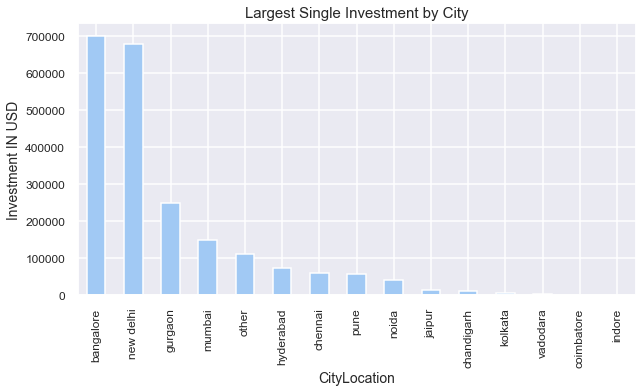

In [63]:
data.groupby('CityLocation').AmountInUSD.max().sort_values(ascending=False).head(15).plot(kind='bar')
plt.tick_params(labelsize = 12)
plt.title('Largest Single Investment by City', fontsize=15)
plt.ylabel('Investment IN USD', fontsize=14)
plt.xlabel('CityLocation', fontsize=14)
plt.show();

**Takeaway:** BANGALORE is the city which got the most investments, interms of DOLLARS, COUNT and SINGLE LARGEST Investment.

[Back to Ouline](#Outline)

## 2.6. Who are the important investors in the Indian Ecosystem?

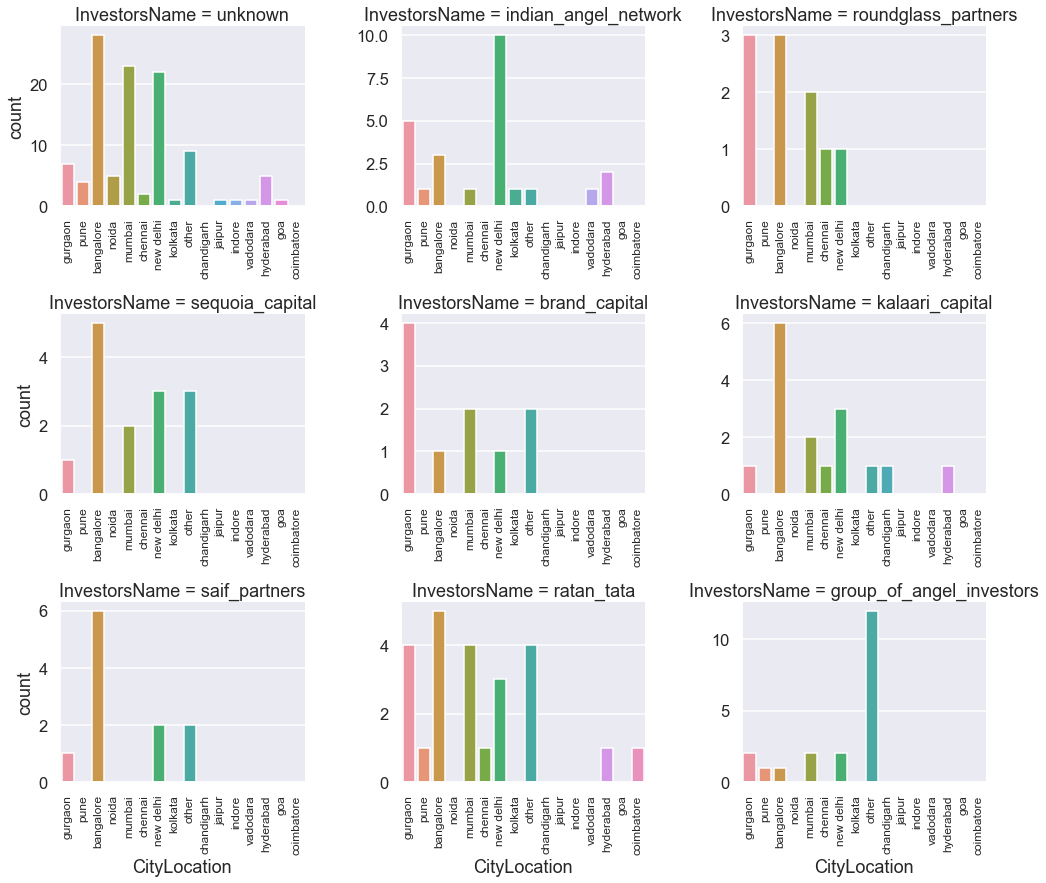

In [64]:
Investors = data.InvestorsName.value_counts()[0:9].index.tolist()
dfplot = data[data.InvestorsName.isin(Investors)]
g=sns.catplot(col='InvestorsName', x='CityLocation', kind='count', data=dfplot,col_wrap=3,sharey=False,
              sharex=False,height=4,aspect=1.2,)
g.set_xticklabels(rotation=90,fontsize=12)
plt.subplots_adjust(hspace = 0.6)
plt.show()

In [65]:
data.groupby('InvestorsName').AmountInUSD.agg(['count','min','max','mean']).sort_values('count', ascending=False).head(10)

,count,min,max,mean
InvestorsName,,,,
unknown,110,25.0,11100.0,729.227273
indian_angel_network,25,37.0,1600.0,366.400000
ratan_tata,24,150.0,150.0,150.000000
group_of_angel_investors,20,16.6,250.0,127.980000
kalaari_capital,16,100.0,6000.0,1565.625000
sequoia_capital,14,150.0,50000.0,13510.714286
saif_partners,11,500.0,10000.0,2609.090909
brand_capital,10,150.0,25000.0,5037.500000
roundglass_partners,10,150.0,2000.0,505.000000


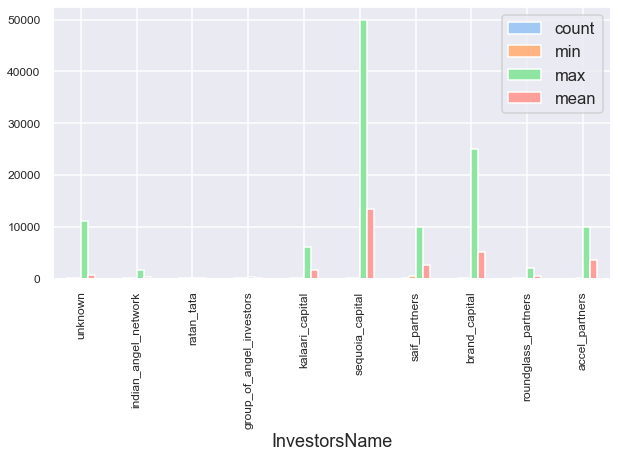

In [66]:
data.groupby('InvestorsName').AmountInUSD.agg(['count','min','max','mean']).sort_values('count', ascending=False).head(10).plot(kind='bar')
plt.tick_params(labelsize = 12);

In [67]:
data[data.IndustryVertical == 'online marketplace'].AmountInUSD.mean()

700000.0

In [68]:
data.loc[data.IndustryVertical == 'online marketplace',:]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
1976,2015,Flipkart.com,online marketplace,NaN,bangalore,steadview_capital_and_existing_investors,private equity,700000.0,"Late Stage, 10th Round More here"


[Back to Ouline](#outline)

## 2.7. How much funds does startups generally get in India?

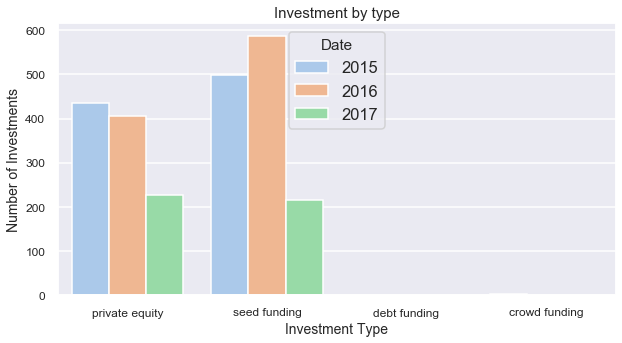

In [69]:
sns.countplot(data.InvestmentType, hue=data.Date)
plt.tick_params(labelsize = 12)
plt.title('Investment by type',fontsize=15)
plt.ylabel('Number of Investments',fontsize=14)
plt.xlabel('Investment Type',fontsize=14)
plt.show();

In [70]:
data.groupby('InvestmentType').AmountInUSD.agg(['count','min','max','sum','mean']).sort_values('count', ascending=False).round()

,count,min,max,sum,mean
InvestmentType,,,,,
seed funding,1301,16.0,7500.0,423396.0,325.0
private equity,1067,100.0,700000.0,15258405.0,14300.0
crowd funding,2,31.0,125.0,156.0,78.0
debt funding,1,7800.0,7800.0,7800.0,7800.0


In [71]:
data.groupby('Date').AmountInUSD.agg(['count','min','max','sum','mean']).sort_values('count', ascending=False).round()

,count,min,max,sum,mean
Date,,,,,
2016,992,22.0,200000.0,3888989.0,3920.0
2015,936,16.0,700000.0,8715322.0,9311.0
2017,443,18.0,330000.0,3085446.0,6965.0


# 3. Experimental Design 

[Back to Ouline](#Outline)

## 3.1. Problem
As an investee we want to invest in a Tier B city in city. Will we get the same investment as tier A cities?

## 3.2. Solution
Simply looking at number or dollar amount of investments is not enough. We need to take into account the differnt conditions in Tier A cities vs Tier B cities and make a comparitive annalysis of what factors effect the investment category and amount.

## 3.3. Hypothesis
City location does play an important part in getting investments

## 3.4. Sample Selection
Identify all the tier B cities that got investments as subsetA and comapre it to investments made in tier A cities as another subsetB. the subsets shoudl include other factots such as demographics, universities, closeness to airport, etc.

## 3.5. Treatment
Each factor in each category will be given a certain rating.


# 4. Rollout and Evaluation

[Back to Ouline](#Outline)

## 4.1. Rollout Plan
We will assign each category and sub category a weight.
For example demographics and Closeness to an airport will get 7 as the are important part of a business.
But weather conditions will get a 3 as its not a very important condition.
Each city will then get points based on each category.
A rating system will be applied to the mean points.


## 4.2. Evaluation Plan

[Back to Ouline](#Outline)


### 4.2.1 Metrics 
The ratings are from 1 to 10 with 1 being the lowest and 10 the higest.

### 4.2.2. Success Criteria
At the end of the experiment the subsetA will be compared to subsetB. A t-test will be performed to the mean rating average of the two groups.

### 4.2.3. If P < 0.075:
Assume the differece to be significant and thus we'll believe our results.

### 4.2.4. If P > 0.075:
* Consider any difference between the groups to be likely the result of chance.
* Repeat the experiment selecting two different groups and improve the execution.